<a href="https://colab.research.google.com/github/prasadanvekar/elvtrdocs/blob/main/Assignment_10_Customer_Segmentation_Coding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Number of Columns: 5
Column Names: ['CustomerID', 'Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.5000

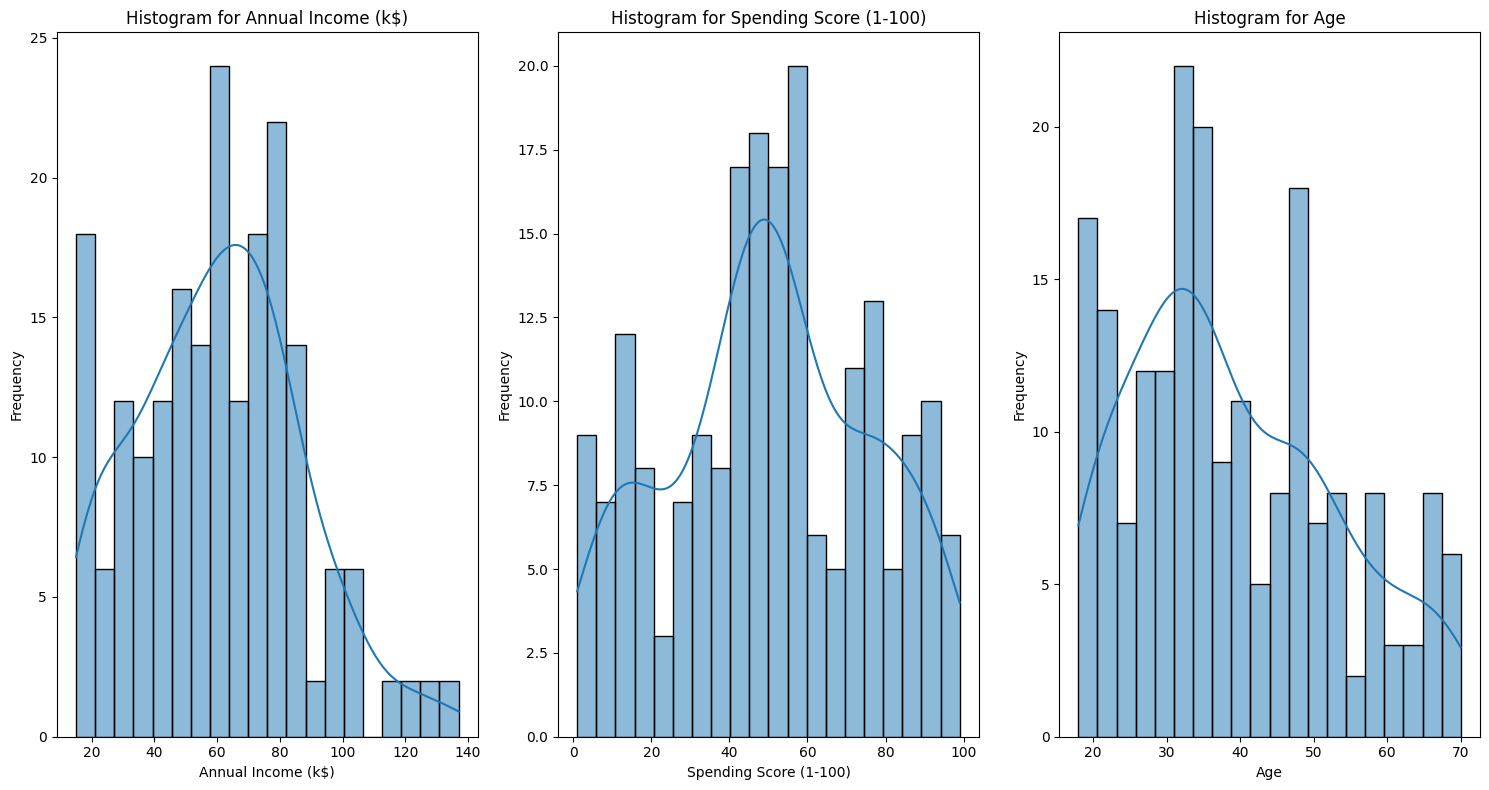

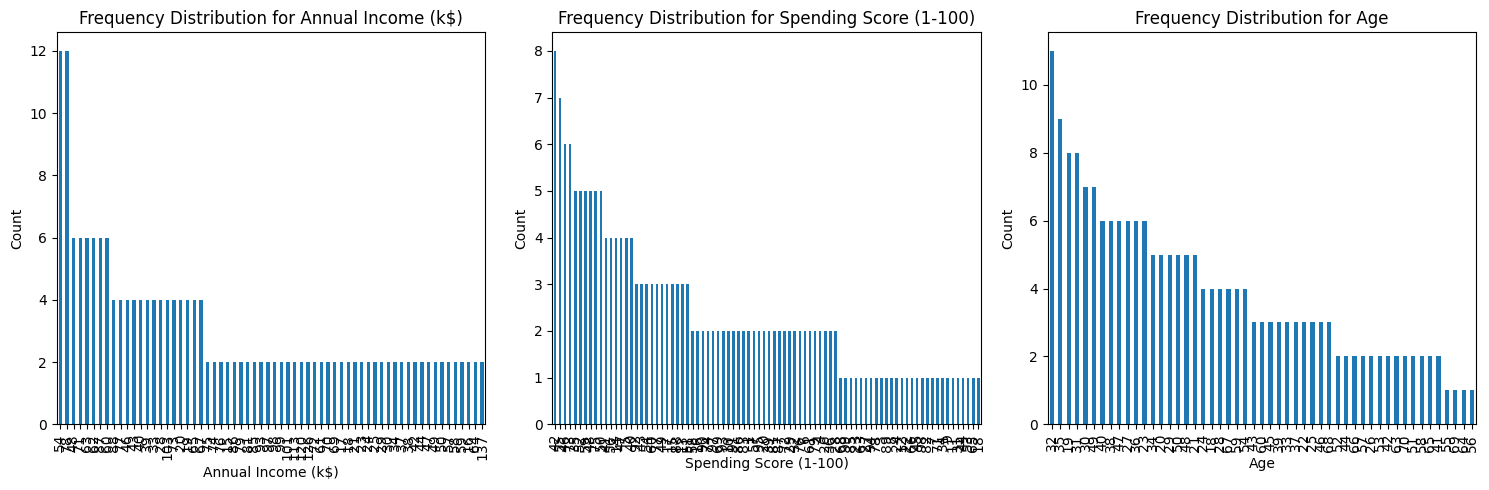

Correlation Matrix for Numeric Variables:
                        CustomerID       Age  Annual Income (k$)  \
CustomerID                1.000000 -0.026763            0.977548   
Age                      -0.026763  1.000000           -0.012398   
Annual Income (k$)        0.977548 -0.012398            1.000000   
Spending Score (1-100)    0.013835 -0.327227            0.009903   

                        Spending Score (1-100)  
CustomerID                            0.013835  
Age                                  -0.327227  
Annual Income (k$)                    0.009903  
Spending Score (1-100)                1.000000  


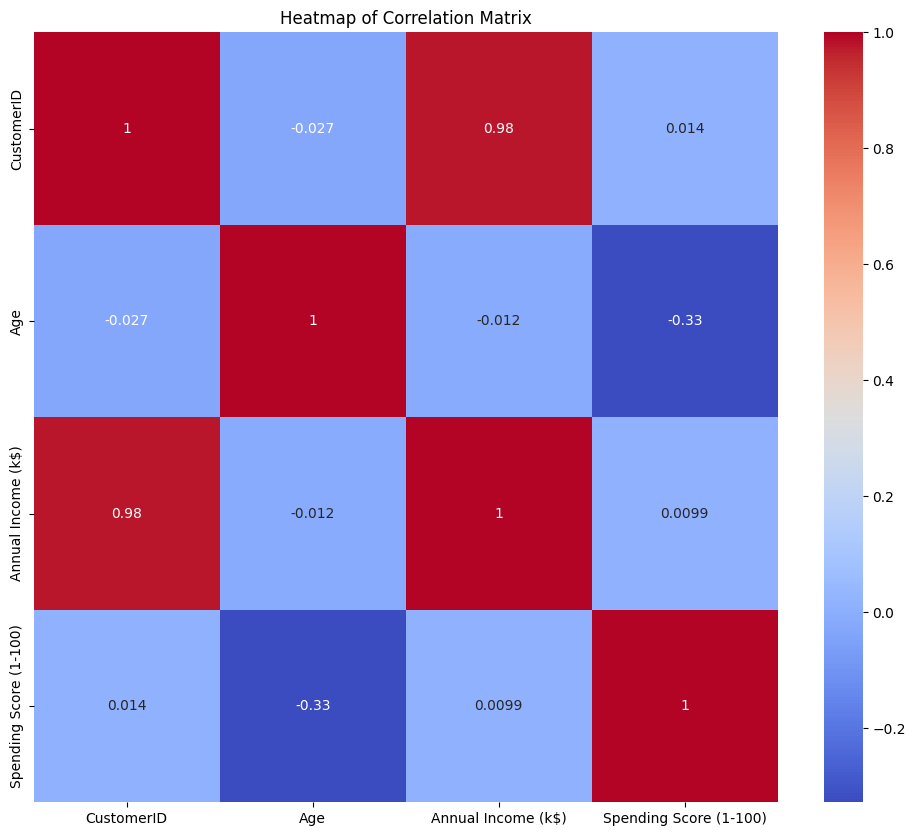

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


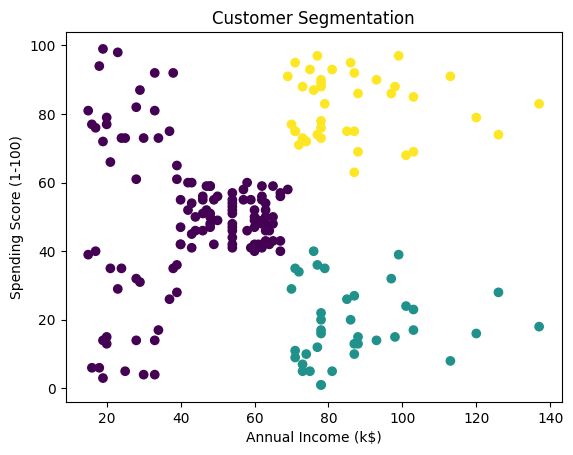

           0          1
0  44.154472  49.829268
1  87.000000  18.631579
2  86.538462  82.128205


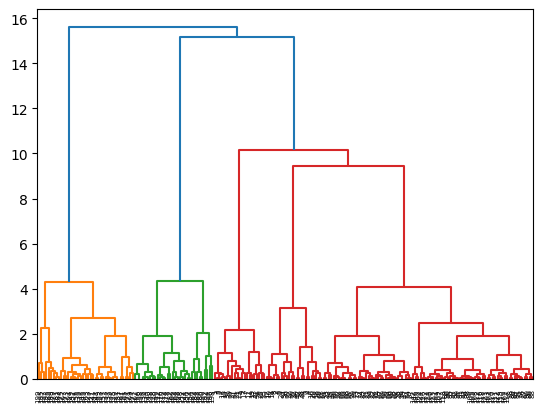

In [10]:
###############################################################################################
# Assignment#4:Customer Segmentation                                                          #
# Objective : Implement Customer Segemention Technique for the given dataset                  #
# Author: Prasad S Anvekar                                                                    #
# Date: 26 Jan 2024                                                                           #
###############################################################################################

# Importing the required libraries

import os
import pandas as pd
import sklearn as sk
import json
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
import seaborn as sns

# Define the Data Path where the file are located.
# File will have to be uploaded to required folder/directory before running the code.

DATA_PATH = "Mall_Customers.csv"

# Error Hanlding for Data Path and File not found scenarios.

if os.path.exists(DATA_PATH):
    # Read from file if we've already downloaded the data.
    with open(DATA_PATH) as f:
        data = pd.read_csv('Mall_Customers.csv', low_memory=False)
else:
     print("File not found!")

#################################################################
#Data exploration, analysis & Preprocessing
#Background: Understanding the dataset's structure and key characteristics.

#################################################################
# understanding the data

# Get the number of columns
num_columns = data.shape[1]

# Display column names
column_names = data.columns.tolist()

print(f"Number of Columns: {num_columns}")
print(f"Column Names: {column_names}")

print(data.head())
print(data.describe())

# Data Exploration: Distributions for Numeric Variables
numeric_columns = ['Annual Income (k$)', 'Spending Score (1-100)', 'Age']
plt.figure(figsize=(15, 8))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(1, len(numeric_columns), i)  # Fix the subplot call
    sns.histplot(data[column], bins=20, kde=True)
    plt.title(f'Histogram for {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Data Exploration: Frequency Distribution for Categorical Variables
categorical_columns = ['Annual Income (k$)', 'Spending Score (1-100)', 'Age']
plt.figure(figsize=(15, 5))
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(1, len(categorical_columns), i)
    data[column].value_counts().plot(kind='bar')
    plt.title(f'Frequency Distribution for {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
plt.tight_layout()
plt.show()

# Statistical Analysis on data
numeric_data = data.select_dtypes(include=[np.number])
corr_matrix = numeric_data.corr()
print("Correlation Matrix for Numeric Variables:")
print(corr_matrix)

# Heatmap for the correlation matrix on data
plt.figure(figsize=(12, 10))
# Selecting a subset of the correlation matrix for better visualization
sns.heatmap(corr_matrix.iloc[:10, :10], annot=True, cmap='coolwarm')
plt.title('Heatmap of Correlation Matrix')
plt.show()

#################################################################
#Enhanced Clustering with K-Means
# Background: Application of K-Means clustering to the standardized data.
#################################################################
# Select relevant features for clustering
selected_features = data[['Annual Income (k$)', 'Spending Score (1-100)']]

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(selected_features)

# Apply KMeans clustering
num_clusters = 3  # This can be adjusted based on experimentation
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
data['Cluster'] = kmeans.fit_predict(scaled_data)

# Visualize the clusters (for two features)
plt.scatter(data['Annual Income (k$)'], data['Spending Score (1-100)'], c=data['Cluster'], cmap='viridis')
plt.title('Customer Segmentation')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

# Display the cluster centers (in the standardized feature space)
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
cluster_centers_df = pd.DataFrame(cluster_centers)
print(cluster_centers_df)

#################################################################
#Advanced Implementation of Hierarchical Clustering
#Background: Applying and interpreting Hierarchical Clustering.
#################################################################
# Prepare for Hierarchical Clustering
Z = linkage(scaled_data, 'ward')
dendrogram(Z)
plt.show()

